In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# A Little Statistics

### 1. Converting a probability into a sigma

#### A.
The normal distribution is a symmetrically distributed bell curve of the outcomes or potential outcomes for a given dataset. The probability density of the normal distribution is given by:

$$P(x) = \frac{1}{\sigma\sqrt{2pi}} e^{-(x-\mu)^2/({2\sigma^2})}$$

where x=value, $\mu$ = mean (the center of the distribution), and $\sigma^2$ is the variance of the distribution. For the standard normal distribution (where mean=0 and sigma=1), the Z-score is the value for which a given percentage of the data is above that value. 

#### B.
The error function is a function integrates the pdf from the left to the Z-score value you input. erf(1) tells us 84.3% of data is below Z score of 1 while erfc(1) tells us that 15.7% of distribution is above Z score of 1. These values match up with those from the Z table. I also show that erfc(1)+erf(1) = 1, to demonstrate that the integral of the normal distribution across all space is 1. erf(x) should be equivilant to cdf(x) where cdf is the "cumulative density function", and sums from -inf up to the value "x". I have some confusion why erf(1) and cdf(1) are not equivalent in the 1/100th place, as these should calculate the same quantity.

In [2]:
scipy.special.erfc(1)

0.15729920705028516

In [3]:
scipy.special.erf(1)

0.8427007929497148

In [4]:
scipy.special.erfc(1)+scipy.special.erf(1)

1.0

In [5]:
stats.norm.cdf(1)

0.8413447460685429

#### C.
Probability of sigma values. I used the cumulative density of 0.841 which I know is associated with a sigma of 1. I also put in the percentage for a sigma of 5.

In [6]:
stats.norm.ppf(0.841)

0.9985762706156592

In [7]:
stats.norm.ppf(stats.norm.cdf(1))

1.0

In [8]:
stats.norm.ppf(.9999997133484281)

4.999999999970176

#### D.
Cumulative density of 0.16 gives a -1 sigma because it is less than the mean of the distribution. Probability values left of the center of the normal distribution have negative sigma.

In [34]:
stats.norm.ppf(.16)

-0.994457883209753

### 2. Continuous analytic distributions (Lognorm distribution)

#### A.
The Lognormal distribution is the probability density function for a variable whose logarithm is normally distributed. I.E. for some variable X, Y is normally distributed for:

$$ Y = \ln{X} $$

It is a function of its mean and standard deviation, which causes the plot to become more skewed onto the mean as it approaches 1.

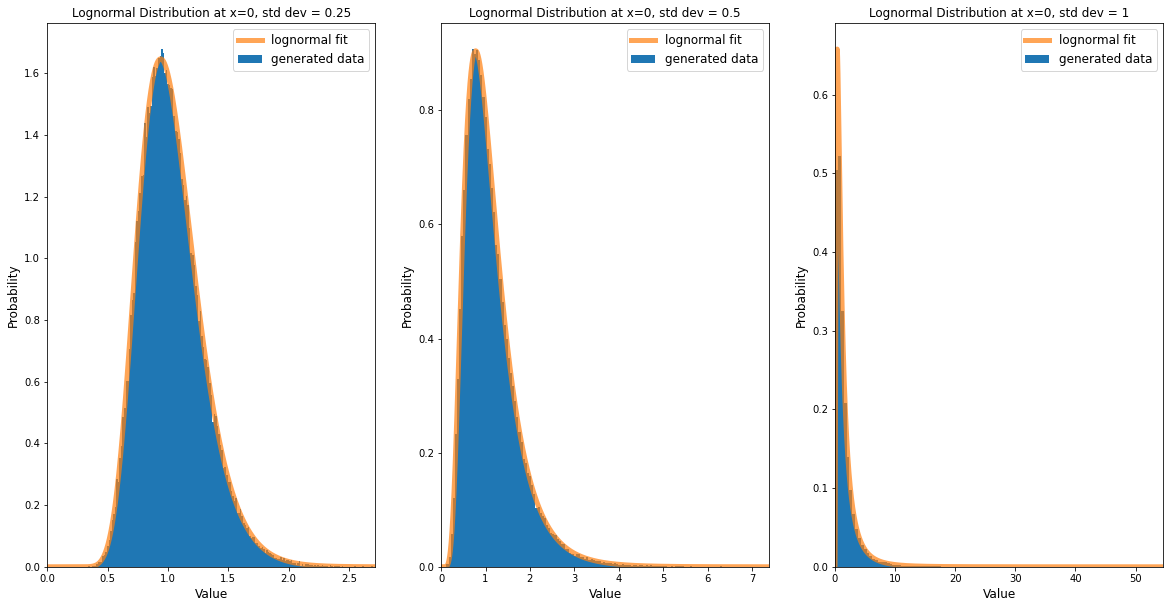

In [58]:
#scale parameter for the lognormal distribution
plots = [0.25,0.5,1]

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1, len(plots))
plt.tick_params(labelsize = 10)

for idx,val in enumerate(plots):
    dist = stats.lognorm([val],loc=0)
    
    
    sigma_4 = stats.lognorm.isf(1-stats.norm.cdf(4),val,loc=0)
    r = stats.lognorm.rvs(val,size=100000)
    x = np.linspace(0,sigma_4,10000)
                                
    ax[idx].hist(r,200, density=True, label = 'generated data')
    ax[idx].plot(x,dist.pdf(x),linewidth = 5,alpha = 0.7, label = 'lognormal fit')
    ax[idx].set_title(f'Lognormal Distribution at x=0, std dev = {val}', fontsize='large')
    ax[idx].set_xlim(0,sigma_4)
    ax[idx].set_xlabel('Value',fontsize='large')
    ax[idx].set_ylabel('Probability',fontsize='large')
    ax[idx].legend(fontsize= 'large')

plt.show()

### 3.

#### A.
Hypothetically I make a measurement of 2.0 on the s=1 distribution.

#### B.
What is the probability the signal-free distribution would produce a measurement that is equally or more signal like than my observation?
#### C.

$ \LARGE \int_{2}^{\infty} \text{pdf}(x) {dx} $

#### D.
By taking 1 - CDF at 2 (or the survival function at 2), I found that 0.14% of measurements from the signal-free gaussian would produce this result.

In [11]:
my_measurement = 2
s=1

In [12]:
1 - stats.lognorm.cdf(my_measurement,s,loc=0,scale = 0.1)

0.0013689334878580484

In [13]:
stats.lognorm.sf(my_measurement,s,loc=0,scale = 0.1)

0.0013689334878580878

#### E.
By taking the norm.ppf of our found cdf value, I found that this is equivalent to a ~3 Sigma in a normal distribution.

In [14]:
stats.norm.ppf(stats.lognorm.cdf(my_measurement,s,loc=0,scale = 0.1))

2.9957322735539997

In order to achieve 5-Sigma for this distribution, I would need to find a measurement of lognorm.cdf = norm.cdf(5). To find this I used the inverse survival function, and found that I would need a measurement of 14.84 for it to be a 5-Sigma result.

In [15]:
stats.lognorm.isf(1-stats.norm.cdf(5),s,loc=0,scale = 0.1)

14.841315909815032

## Non-continuous distributions (Poisson)

#### A.
The Poisson distribution is a model for when the average time between events is known, but when the events will occur is not known. For a given number of events k, the probability of measuring k events in a given timeframe is:

$$Pr(x=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$ 

where $\lambda$ is the expected value of x, and its variance. The plots show that the distribution is centered on $\lambda$ and as $\lambda$ increases, so does the width of the distribution. This distribution is discrete, because you cannot measure a fractional number of events taking place. 

#### B.

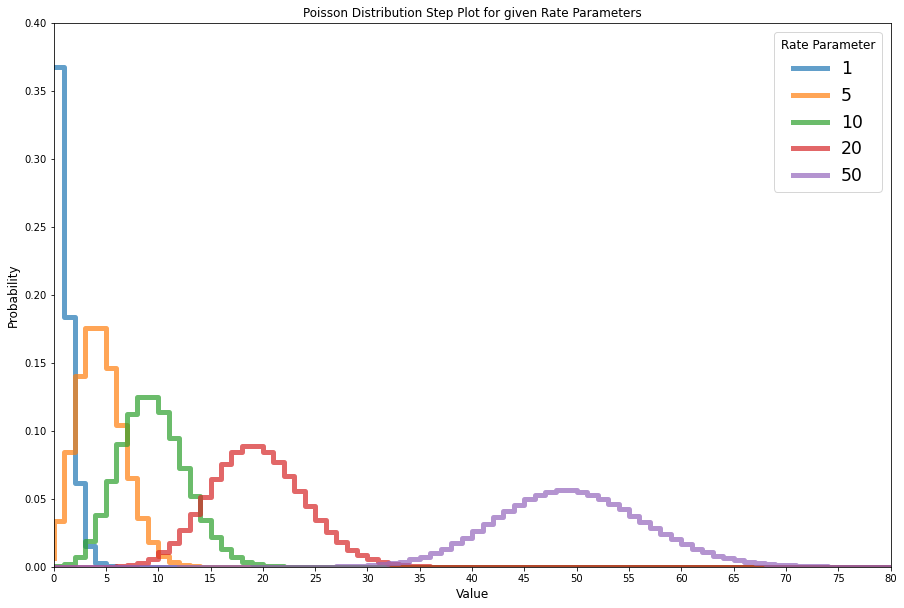

In [16]:
x = np.linspace(0,80,81)
rate = [1,5,10,20,50]

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1,1)
plt.tick_params(labelsize = 10)
plt.xticks(np.linspace(0,80,17))
plt.xlim(0,80)
plt.ylim(0,0.4)
plt.title('Poisson Distribution Step Plot for given Rate Parameters', fontsize = 'large')
plt.xlabel('Value',fontsize='large')
plt.ylabel('Probability',fontsize='large')

#plt.vlines(x,0,stats.poisson.pmf(x,10))

for val in rate:
    pmf = stats.poisson.pmf(x,val)
    plt.step(x,pmf,linewidth=5,alpha = 0.7,label = f'{val}')
    
plt.legend(title='Rate Parameter',title_fontsize = 'large',fontsize='xx-large')
plt.show()

#### C.

Suppose my signal-less distribution produced a rate parameter of 10. Given this, what is the probability of obtaining a measurement of 45 or greater from the signal-less distribution?

In [17]:
s=10
my_measurement = 45

stats.poisson.sf(my_measurement,s)

1.0464947441174539e-16

Now I see that the measurement of 45 would be extremely unlikely from a signal-less distribution, and has a sigma value of 8.2 associated with it.

In [18]:
stats.norm.ppf(stats.poisson.cdf(my_measurement,s))

8.209536151601387

#### D.

Since probabilities and sigmas are discrete, this means that there will be a certain value measurement that crosses the 5-Sigma barrier, while 1 less than that value would not. For experiments this would create a sort of 'benchmark' value that you are hoping to produce. 

#### E.

It makes sense that discrete values can still have non-discrete means. For example, the average value of a die roll would be 3.5. So the expected value of a measurement can change continuously with changes in the parameters, but the measured value will still always be discrete. This property means that unlike in continuous probability distributions -- where the continuous nature means taking the probabilty of any single value is nonsensical -- we can calculate the probability of a discrete value. 